In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/test.csv


In [2]:
pip uninstall scikit-learn imbalanced-learn -y


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 13.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [4]:
pip install xgboost lightgbm --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
#os.remove("submission.csv")

In [6]:
# Importing necessary libraries for data manipulation, visualization, model training, and evaluation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn modules for preprocessing, model training, and evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer

# Scikit-learn modules for preprocessing, model training, and evaluation
from imblearn.combine import SMOTETomek

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
import os
warnings.filterwarnings("ignore")

In [7]:
# # Loading training and testing data
train_df = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/train.csv")
test_df = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/test.csv")


# Identifying datatypes


The data types of the different columns are identified and explicitly stated in the notebook

In [8]:
# Display data types
train_df.dtypes


id                    int64
customer_id           int64
last_name            object
credit_score        float64
country              object
gender               object
age                 float64
tenure                int64
acc_balance         float64
prod_count          float64
has_card            float64
is_active           float64
estimated_salary    float64
exit_status           int64
dtype: object

#  Descriptive statistics

Details such as min value, max value, mean and median for each numerical column is presented

In [9]:
# Descriptive statistics
train_df.describe()


,id,customer_id,credit_score,age,tenure,acc_balance,prod_count,has_card,is_active,estimated_salary,exit_status
count,90000.000000,9.000000e+04,80444.000000,90000.000000,90000.000000,82743.000000,85137.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,44999.500000,1.569209e+07,656.497054,38.119533,5.017022,55456.732147,1.552932,0.754289,0.497178,112394.659679,0.211600
std,25980.906451,7.129796e+04,80.016856,8.855203,2.804813,62788.474236,0.548011,0.430510,0.499995,50360.440702,0.408445
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,22499.750000,1.563361e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74430.360000,0.000000
50%,44999.500000,1.569016e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117505.070000,0.000000
75%,67499.250000,1.575674e+07,710.000000,42.000000,7.000000,119825.750000,2.000000,1.000000,1.000000,154874.787500,0.000000
max,89999.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
# Drop ID columns
test_ids = test_df['id']
train_df.drop(columns=['customer_id'], inplace=True)
test_df.drop(columns=['customer_id'], inplace=True)


In [11]:
# Drop Duplicates
train_df.drop_duplicates(inplace=True)

# Identifying missing values

In [12]:
print("Missing Values in Train")
print(train_df.isnull().sum())
print("\n\n Missing Values in Test")
print(test_df.isnull().sum())


Missing Values in Train
id                     0
last_name              0
credit_score        9556
country             6021
gender                 0
age                    0
tenure                 0
acc_balance         7257
prod_count          4863
has_card               0
is_active              0
estimated_salary       0
exit_status            0
dtype: int64


 Missing Values in Test
id                     0
last_name              0
credit_score        3185
country             4606
gender                 0
age                    0
tenure                 0
acc_balance         5251
prod_count          1717
has_card               0
is_active              0
estimated_salary       0
dtype: int64


# Encodings

 Purpose
To convert categorical string values into numeric form, because:

Most ML models (e.g., Logistic Regression, Tree-based models) do not handle strings directly.


In [13]:
# Label Encoding
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_df[categorical_cols] = ordinal_encoder.fit_transform(train_df[categorical_cols])
test_df[categorical_cols] = ordinal_encoder.transform(test_df[categorical_cols])


In [14]:
# Split features and target
X = train_df.drop(columns='exit_status')
y = train_df['exit_status']

# **Visualization 1**

Purpose:
To check if the dataset is imbalanced — an essential diagnostic before applying any sampling method like SMOTE or SMOTETomek.

Insight:
If one class (e.g., exit_status = 1) appears far less frequently than the other, it will bias most ML models toward predicting the majority class. This visualization justifies the need for resampling

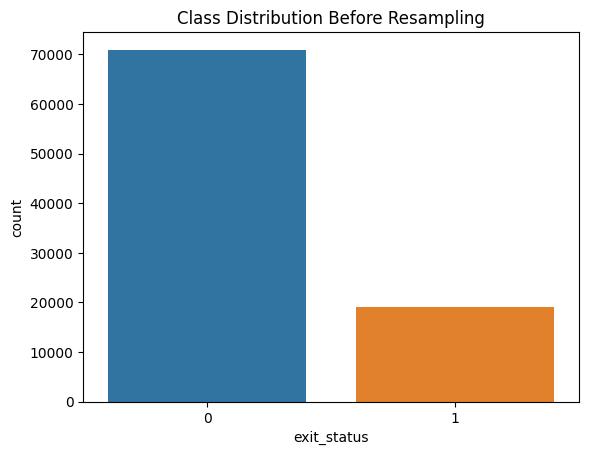

In [15]:
#  Visualization 1: Target distribution before SMOTE
sns.countplot(x=y)
plt.title("Class Distribution Before Resampling")
plt.show()


# **Outlier Handling**

In [16]:
# Outlier Handling
num_cols = X.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X[col] = np.clip(X[col], lower, upper)


# **Visualization 2**

Purpose:
To explore relationships between numerical features — helps:

Detect multicollinearity,

Identify redundant features,

Understand how strongly features correlate with the target variable (if included).

Insight:
Features with high correlation to each other might reduce model interpretability and inflate variance. The heatmap gives a good first glance at which features might be grouped, dropped, or transformed.



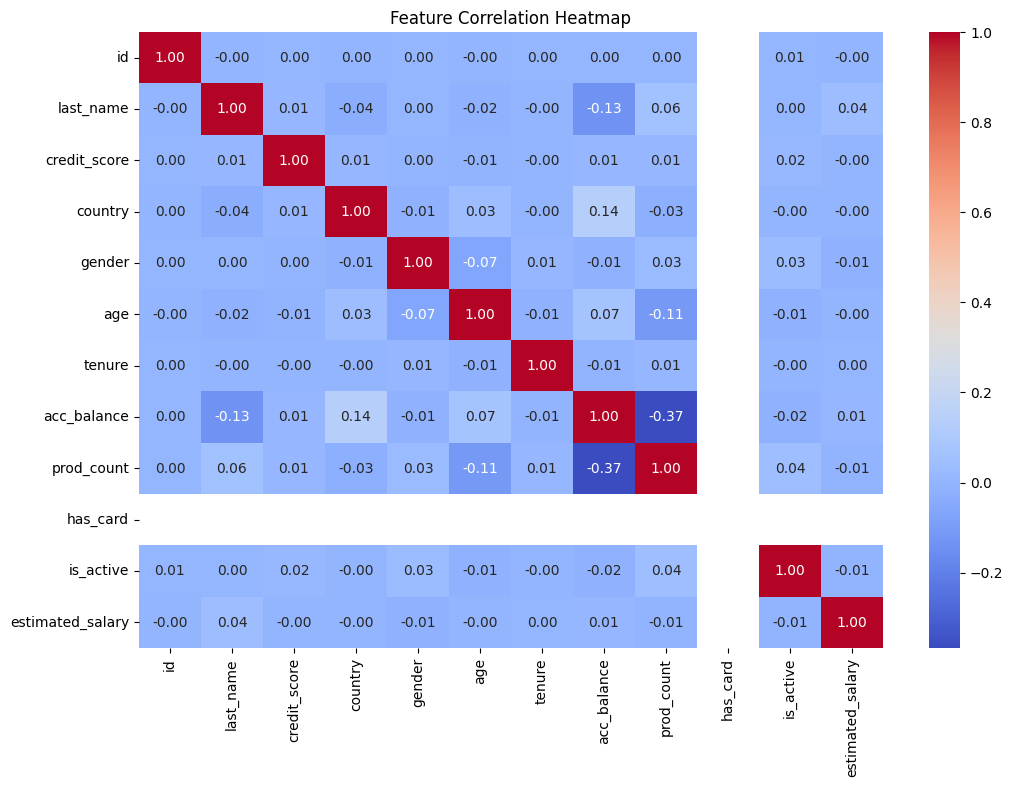

In [17]:
# Visualization 2: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X, columns=train_df.columns[:-1]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


IMPUTATION -
Purpose
To fill missing values so that:

The dataset remains complete (no nulls).

ML models can be trained without errors (many don't accept NaNs).

 Insight
strategy='mean' is appropriate when:

The data is normally distributed.

There are no extreme outliers (or they’ve been treated).

If the data is skewed, median imputation is often better.


SCALING - 

# 💡 Reason: Models like KNN, Logistic Regression, SVM are sensitive to feature scales.
# Tree-based models don’t need this, but for uniformity, we scale everything.



In [18]:
# Impute + Scale
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.transform(test_df)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [19]:
# Apply SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_scaled, y)


# **Visualization 3**

Purpose:
To verify that class imbalance has been corrected after resampling.

Insight:
You should now see both classes nearly equal. This confirms that the model training will be more balanced and the classifier won't overly favor the majority class anymore.

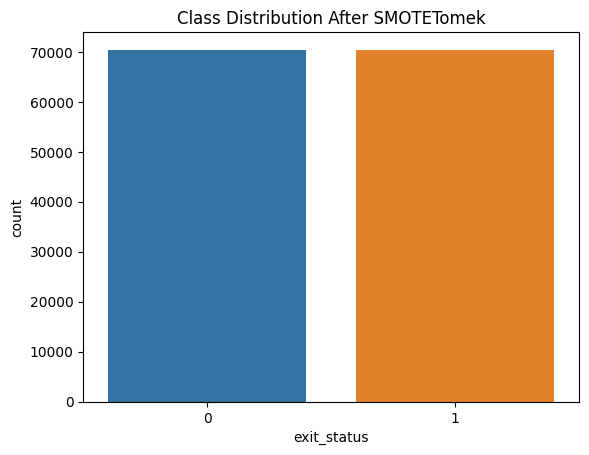

In [20]:
# Visualization 3: Target distribution after SMOTETomek
sns.countplot(x=y_res)
plt.title("Class Distribution After SMOTETomek")
plt.show()

In [21]:
# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)


# **7+ model training**

In [22]:
# Model training
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3),
    "LightGBM": LGBMClassifier(class_weight='balanced'),
    "CatBoost": CatBoostClassifier(verbose=0)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    results[name] = {"Accuracy": acc, "F1": f1}



[LightGBM] [Info] Number of positive: 56336, number of negative: 56336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 112672, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


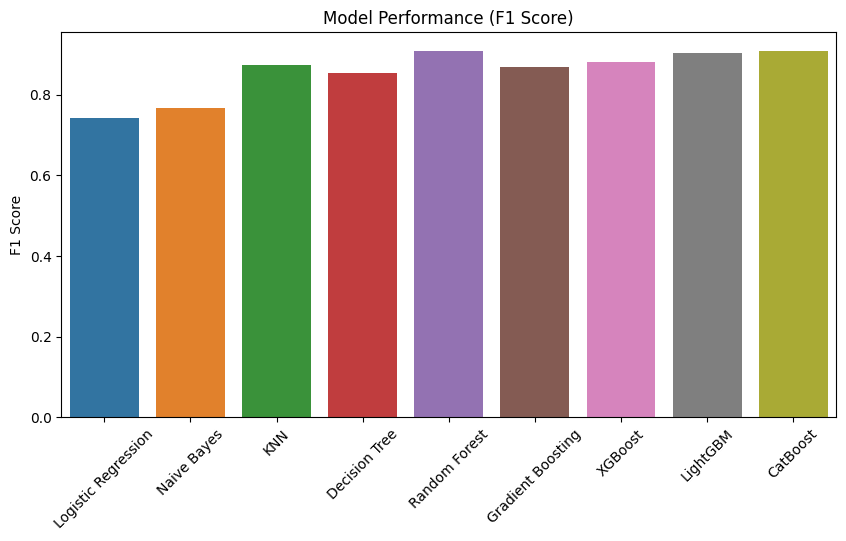

In [23]:
# Visualize F1 Scores
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=[v["F1"] for v in results.values()])
plt.xticks(rotation=45)
plt.ylabel("F1 Score")
plt.title("Model Performance (F1 Score)")
plt.show()


Purpose:
To visually compare F1 scores across models — ideal for imbalanced classification since F1 balances precision and recall.

Insight:
Makes it easy to select top-performing models for hyperparameter tuning or ensemble inclusion.

# **Hyperparameter tuning for 3 models**

In [24]:
# Hyperparameter tuning for top 3 models
xgb_params = {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.05, 0.1]}
xgb_search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=3, scoring='f1', n_iter=5, random_state=42)
xgb_search.fit(X_train, y_train)

lgbm_params = {'n_estimators': [100, 200], 'max_depth': [-1, 10], 'learning_rate': [0.05, 0.1]}
lgbm_search = RandomizedSearchCV(LGBMClassifier(), lgbm_params, cv=3, scoring='f1', n_iter=5, random_state=42)
lgbm_search.fit(X_train, y_train)

rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10, 20]}
rf_search = RandomizedSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring='f1', n_iter=5, random_state=42)
rf_search.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 37557, number of negative: 37557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2309
[LightGBM] [Info] Number of data points in the train set: 75114, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 37558, number of negative: 37557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2305
[LightGBM] [Info] Number of data points in the train set: 75115, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500007 -> initscore=0.0

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='f1')

In [25]:
# Ensemble Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_search.best_estimator_),
    ('lgbm', lgbm_search.best_estimator_),
    ('rf', rf_search.best_estimator_)
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_val = voting_clf.predict(X_val)
print("Validation F1 Score:", f1_score(y_val, y_pred_val))


[LightGBM] [Info] Number of positive: 56336, number of negative: 56336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 112672, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Validation F1 Score: 0.9078919073901512


In [26]:
# Final Model on full data
voting_clf.fit(X_res, y_res)
final_preds = voting_clf.predict(X_test_scaled)


[LightGBM] [Info] Number of positive: 70420, number of negative: 70420
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2328
[LightGBM] [Info] Number of data points in the train set: 140840, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [27]:
# Submission
submission = pd.DataFrame({'id': test_ids, 'exit_status': final_preds})
submission.to_csv("submission.csv", index=False)
print("submission.csv created successfully.")


submission.csv created successfully.


In [28]:
# Clean up /kaggle/working except submission.csv
working_dir = '/kaggle/working'
for filename in os.listdir(working_dir):
    file_path = os.path.join(working_dir, filename)
    if filename != 'submission.csv' and os.path.isfile(file_path):
        os.remove(file_path)
print("Cleaned up /kaggle/working except submission.csv")


Cleaned up /kaggle/working except submission.csv


In [29]:
import os
print("📁 Files in working directory:", os.listdir('/kaggle/working'))

📁 Files in working directory: ['catboost_info', '__notebook__.ipynb', 'submission.csv']
